In [1]:
import numpy as np
import pandas as pd
#import warnings package to ignore warnings which may come later
import warnings


In [2]:
warnings.filterwarnings('ignore')

## Getting The Dataset

In [6]:
column_names=['user_id',"item_id","rating",'timestamp']

In [7]:
df=pd.read_csv("ml-100k/u.data",sep='\t',names=column_names)

In [8]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
df.shape


(100000, 4)

In [11]:
df['item_id'].nunique() #Gives the unique ids of moveis

1682

In [12]:
df['user_id'].nunique() #Gives the unique ids of user

943


### Now we will add another data set u.item and use for getting the movie names 

In [16]:
movie_titles=pd.read_csv("ml-100k/uitem.txt",sep="\|",header=None)

In [17]:
movie_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
movie_titles=movie_titles[[0,1]]

In [19]:
movie_titles.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [22]:
movie_titles.columns=['item_id','title']

In [23]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [24]:
df=pd.merge(df,movie_titles,on='item_id')

In [25]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


## Exploratory data analysis

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [32]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [33]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [34]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [35]:
ratings['no_of_ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [36]:
ratings.head()

,rating,no_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


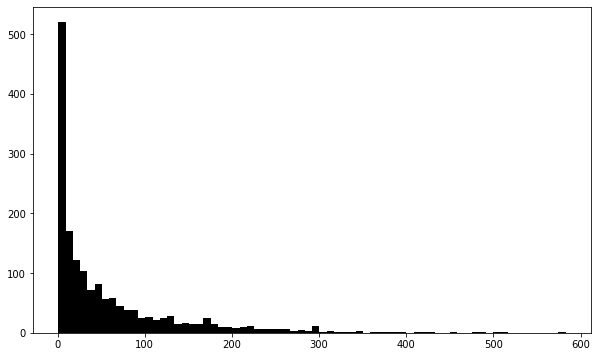

In [40]:
plt.figure(figsize=(10,6))
plt.hist(ratings.no_of_ratings,bins=70,color='black')
plt.show()

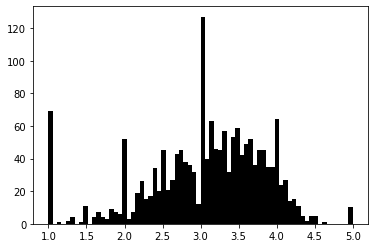

In [44]:
plt.hist(ratings['rating'],bins=70,color='black')
plt.show()

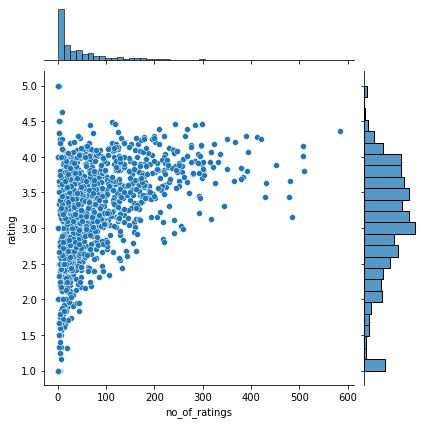

In [45]:
sns.jointplot(x='no_of_ratings',y='rating',data=ratings)

## Creating Movie Recommendation


In [46]:
movie_matrix=df.pivot_table(index='user_id',columns='title',values='rating')

In [48]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [50]:
ratings.sort_values('no_of_ratings',ascending=False).head()

,rating,no_of_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [51]:
starwars_user_ratings=movie_matrix['Star Wars (1977)']

In [52]:
starwars_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [54]:
similar_to_starwars=movie_matrix.corrwith(starwars_user_ratings)

In [55]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [56]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [57]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [58]:
corr_starwars.dropna(inplace=True)

In [59]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [61]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [62]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [63]:
ratings

,rating,no_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [64]:
corr_starwars=pd.merge(corr_starwars,ratings,on='title')

In [65]:
corr_starwars

,Correlation,rating,no_of_ratings
title,,,
'Til There Was You (1997),0.872872,2.333333,9
1-900 (1994),-0.645497,2.600000,5
101 Dalmatians (1996),0.211132,2.908257,109
12 Angry Men (1957),0.184289,4.344000,125
187 (1997),0.027398,3.024390,41
...,...,...,...
Young Guns (1988),0.186377,3.207921,101
Young Guns II (1990),0.228615,2.772727,44
"Young Poisoner's Handbook, The (1995)",-0.007374,3.341463,41


In [67]:
del corr_starwars['rating']

In [69]:
corr_starwars.head()

,Correlation,no_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [70]:
corr_starwars[corr_starwars['no_of_ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,no_of_ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# Predict Movies

In [76]:
def predict_movies(movie_name):
    movie_user_ratings=movie_matrix[movie_name]
    similar_to_movie=movie_matrix.corrwith(movie_user_ratings)
    
    
    corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie=pd.merge(corr_movie,ratings,on='title')
    del corr_movie['rating']
    predictions=corr_movie[corr_movie['no_of_ratings']>100].sort_values('Correlation',ascending=False)
    
    return predictions
    
    

In [77]:
prediction=predict_movies("Titanic (1997)")

In [78]:
prediction.head()

,Correlation,no_of_ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
